## Visualize the Deep Fashion Dataset

In [6]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from PIL import Image
from utils.utils import add_keypoints
import torch
from Deepfashion_Dataset import Deepfashion_Dataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Dataset And Display Images

2025-03-03 14:43:56.562 | INFO     | Deepfashion_Dataset:__init__:25 - Created Deep Fashion Dataset with 123016 images.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7380952..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9637812..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0182073..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9980307..255.0].
Clipping input data to the valid ran

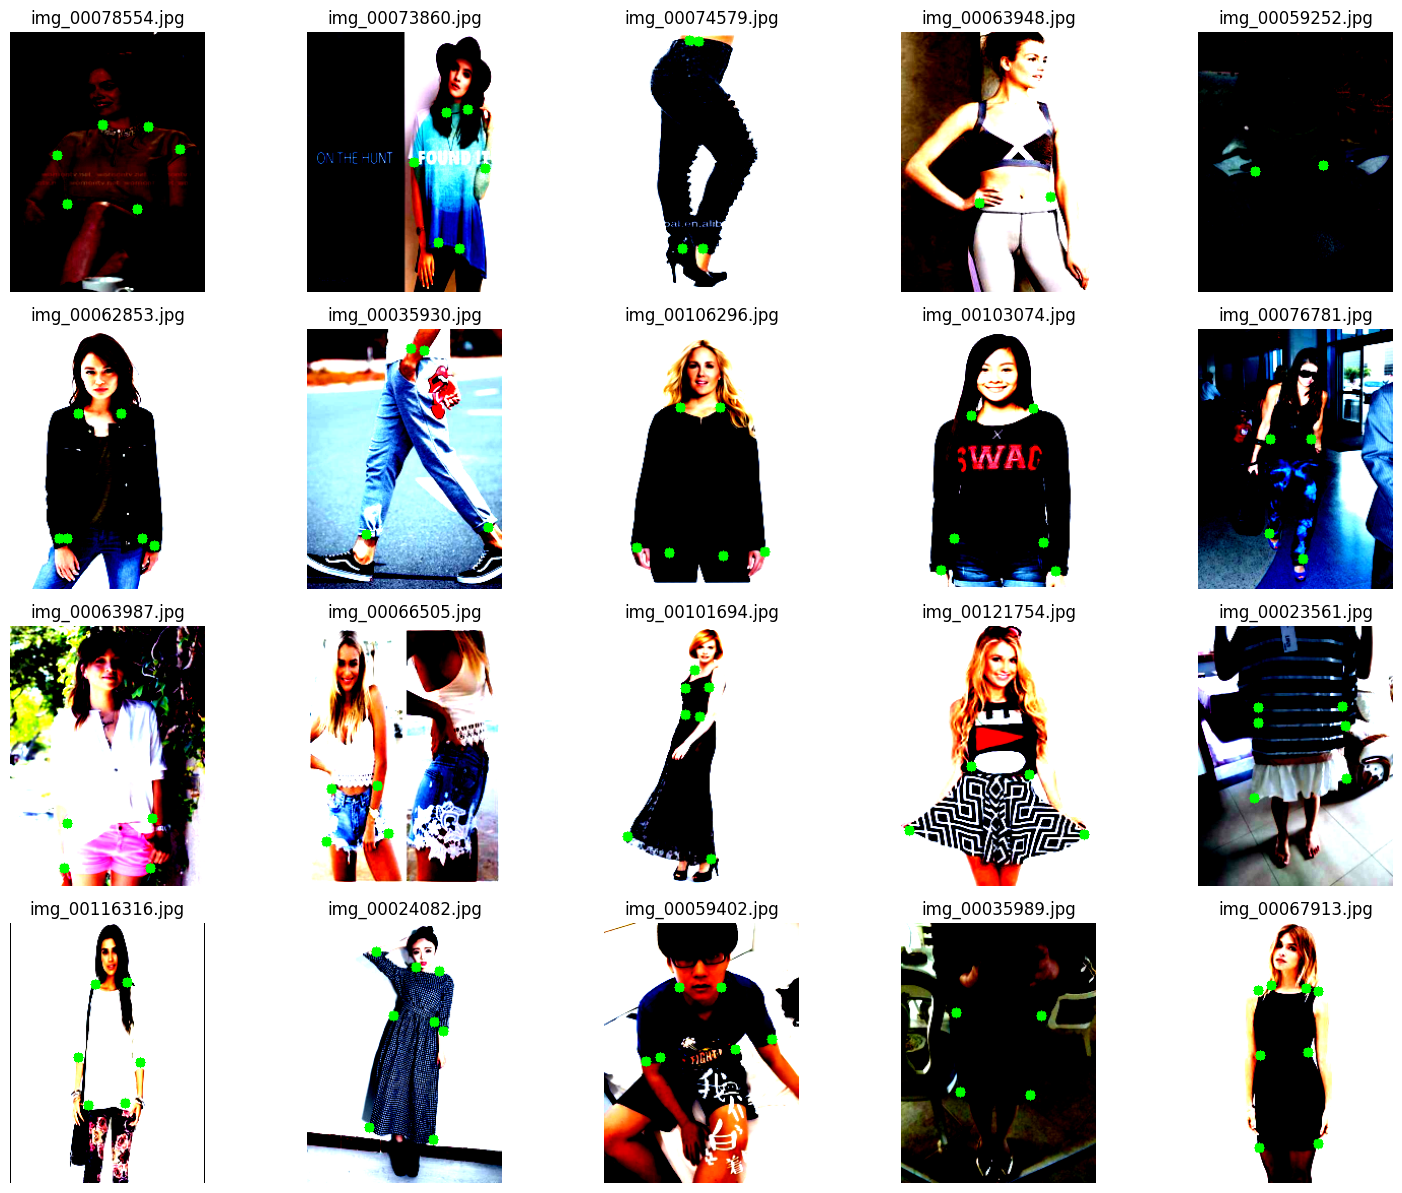

In [64]:
dataset_path = "../../deepfashion"
images = os.listdir(f"{dataset_path}/img")
num_images = 20
rand_ind = np.random.randint(0, len(images), num_images)

dataset = Deepfashion_Dataset(dataset_path)

# Set up the grid dimensions
grid_size = int(np.ceil(np.sqrt(num_images)))
fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Load and display image
for i, ind in enumerate(rand_ind):
    img_name, img, kpts, scoremaps = dataset[ind]
    img = add_keypoints(img, kpts)
    # Display image
    axes[i].imshow(img)
    axes[i].set_title(f"{img_name}")
    axes[i].axis('off')  # Hide axis

# Hide empty subplots
for i in range(num_images, len(axes)):
    axes[i].axis('off')
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


## Visualize Scoremaps

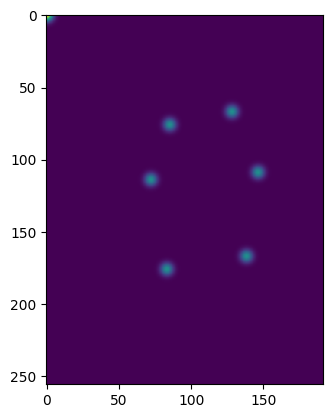

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0357141494750977..206.64000010490417].


<function matplotlib.pyplot.show(close=None, block=None)>

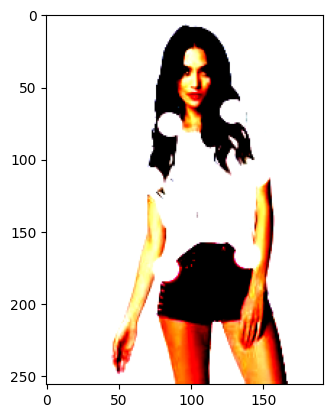

In [90]:
ind = 91
name, img, kpts, scoremaps = dataset[ind]
fig = plt.figure()
plt.imshow(torch.sum(scoremaps, dim=0))
plt.show()
fig = plt.figure()
plt.imshow(img.permute(1,2,0) + torch.sum(scoremaps, dim=0).unsqueeze(0).repeat(3,1,1).permute(1,2,0)*102)
plt.show